In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading and EDA

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
df_submission = pd.read_csv("/kaggle/input/playground-series-s5e3/sample_submission.csv")

In [3]:
df_train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [5]:
df_submission.head()

,id,rainfall
0,2190,0
1,2191,0
2,2192,0
3,2193,0
4,2194,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [7]:
df_train[df_train["id"]==0]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1


In [8]:
df_train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

<Axes: xlabel='rainfall'>

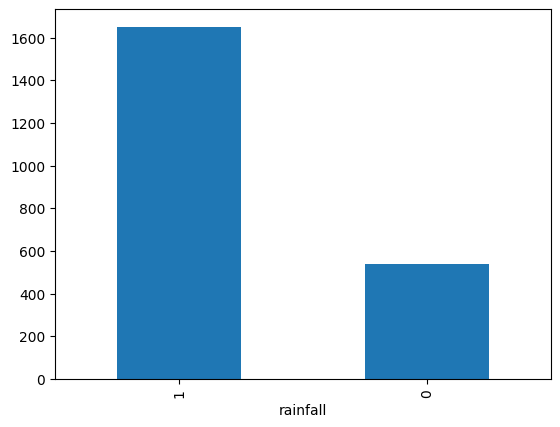

In [9]:
df_train["rainfall"].value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

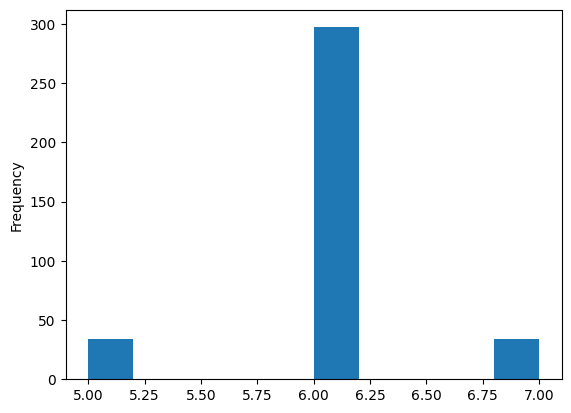

In [10]:
df_train["day"].value_counts().plot(kind="hist")

In [11]:
df_train_2= df_train.drop(columns=["id"])

In [12]:
df_train_2.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

In [13]:
from imblearn.over_sampling import SMOTE



X = df_train_2.drop('rainfall', axis=1)
y = df_train_2['rainfall']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
print(X.shape)
print(y.shape)
print(X_resampled.shape)
print(y_resampled.shape)

(2190, 11)
(2190,)
(3300, 11)
(3300,)


# Randomforest Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (e.g., a Random Forest classifier)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       119
           1       0.86      0.94      0.90       319

    accuracy                           0.84       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.84      0.84      0.84       438



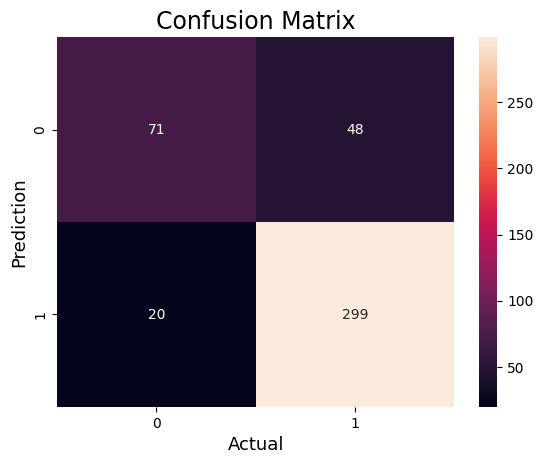

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.

sns.heatmap(cm,
            annot=True,
            fmt='g',
            # xticklabels=['Dog','Not Dog'],
            # yticklabels=['Dog','Not Dog']
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [17]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [18]:
df_test_2= df_test.drop(columns=["id"])

In [19]:
df_test_2.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [20]:
df_test_2[df_test_2["winddirection"].isna()]

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
517,153,1007.8,32.9,30.6,28.9,22.0,65.0,75.0,8.2,NaN,17.2


In [21]:
df_test_2["winddirection"].mode().values[0]

70.0

In [22]:
wind_mode= df_test_2["winddirection"].mode().values[0]
df_test_2["winddirection"] = df_test_2["winddirection"].fillna(value=wind_mode)

In [23]:
df_test_pred = clf.predict(df_test_2)

In [24]:
df_test_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
df_test["id"]

0      2190
1      2191
2      2192
3      2193
4      2194
       ... 
725    2915
726    2916
727    2917
728    2918
729    2919
Name: id, Length: 730, dtype: int64

In [26]:
# Creating a DataFrame from the Series
df_test_predictions = pd.DataFrame({'id': df_test["id"], 'Rainfall': df_test_pred})

In [27]:
df_test_predictions

,id,Rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


# Hyperparameter Tunning

In [28]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X_resampled and y_resampled are your resampled data

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

def objective(trial):
    """Objective function for Optuna."""
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"]) #or suggest_float for a percentage

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report["weighted avg"]["f1-score"]  # Optimize for F1-score

study = optuna.create_study(direction="maximize")  # Maximize F1-score
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train the final model with the best hyperparameters
best_clf = RandomForestClassifier(
    n_estimators=trial.params["n_estimators"],
    max_depth=trial.params["max_depth"],
    min_samples_split=trial.params["min_samples_split"],
    min_samples_leaf=trial.params["min_samples_leaf"],
    max_features=trial.params["max_features"],
    random_state=42,
)

best_clf.fit(X_resampled, y_resampled)
# best_y_pred = best_clf.predict(X_test)
# print("\nClassification Report (Best Model):")
# print(classification_report(y_test, best_y_pred))

[I 2025-03-07 10:17:56,149] A new study created in memory with name: no-name-ab941faf-bf02-47ce-8458-64f414c3f633
[I 2025-03-07 10:17:57,293] Trial 0 finished with value: 0.8726711415674625 and parameters: {'n_estimators': 268, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.8726711415674625.
[I 2025-03-07 10:17:58,053] Trial 1 finished with value: 0.874178579257477 and parameters: {'n_estimators': 163, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.874178579257477.
[I 2025-03-07 10:17:58,989] Trial 2 finished with value: 0.9060580179846235 and parameters: {'n_estimators': 152, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9060580179846235.
[I 2025-03-07 10:18:01,205] Trial 3 finished with value: 0.8832891185759403 and parameters: {'n_estimators': 438, 'max_depth': 7, 'min_sa

Number of finished trials:  50
Best trial:
  Value:  0.9136369584286133
  Params: 
    n_estimators: 416
    max_depth: 17
    min_samples_split: 5
    min_samples_leaf: 1
    max_features: log2


RandomForestClassifier(max_depth=17, max_features='log2', min_samples_split=5,
                       n_estimators=416, random_state=42)

# Xgboost Model

In [29]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Assuming X_resampled and y_resampled are your resampled data

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

def objective(trial):
    """Objective function for Optuna with XGBoost."""
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    gamma = trial.suggest_float("gamma", 0, 5)

    clf = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        gamma=gamma,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report["weighted avg"]["f1-score"]  # Optimize for F1-score

study = optuna.create_study(direction="maximize")  # Maximize F1-score
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train the final model with the best hyperparameters
best_clf = XGBClassifier(
    n_estimators=trial.params["n_estimators"],
    max_depth=trial.params["max_depth"],
    learning_rate=trial.params["learning_rate"],
    subsample=trial.params["subsample"],
    colsample_bytree=trial.params["colsample_bytree"],
    min_child_weight=trial.params["min_child_weight"],
    gamma=trial.params["gamma"],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_clf.fit(X_resampled, y_resampled)

[I 2025-03-07 10:19:32,241] A new study created in memory with name: no-name-95ca4846-94a4-4f82-b5e6-9ed53625f67e
[I 2025-03-07 10:19:32,924] Trial 0 finished with value: 0.9015104035249081 and parameters: {'n_estimators': 386, 'max_depth': 16, 'learning_rate': 0.02394432497436589, 'subsample': 0.5653418706116515, 'colsample_bytree': 0.9055698860530891, 'min_child_weight': 5, 'gamma': 0.3627979141264437}. Best is trial 0 with value: 0.9015104035249081.
[I 2025-03-07 10:19:33,028] Trial 1 finished with value: 0.8939393939393939 and parameters: {'n_estimators': 195, 'max_depth': 7, 'learning_rate': 0.1581503273659025, 'subsample': 0.9472605455654117, 'colsample_bytree': 0.7054559380394873, 'min_child_weight': 9, 'gamma': 2.3983847297511924}. Best is trial 0 with value: 0.9015104035249081.
[I 2025-03-07 10:19:33,109] Trial 2 finished with value: 0.8909090909090909 and parameters: {'n_estimators': 142, 'max_depth': 14, 'learning_rate': 0.24484241015612726, 'subsample': 0.8417754401707309, 

Number of finished trials:  50
Best trial:
  Value:  0.9212012679902589
  Params: 
    n_estimators: 381
    max_depth: 8
    learning_rate: 0.17722049697345188
    subsample: 0.939085990616243
    colsample_bytree: 0.914151272443623
    min_child_weight: 3
    gamma: 0.34325828862434005


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.914151272443623, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.34325828862434005, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17722049697345188,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=381, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
df_test_pred = best_clf.predict(df_test_2)
df_test_predictions = pd.DataFrame({'id': df_test["id"], 'rainfall': df_test_pred})

In [31]:
df_test_predictions

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [32]:
df_test_predictions.to_csv("submission.csv",index=False)


Feature Importances:
          Feature  Importance
7           cloud    0.441473
6        humidity    0.097195
5        dewpoint    0.065547
8        sunshine    0.056689
4         mintemp    0.051709
9   winddirection    0.051152
0             day    0.049001
1        pressure    0.047868
2         maxtemp    0.047601
10      windspeed    0.046875
3     temparature    0.044892


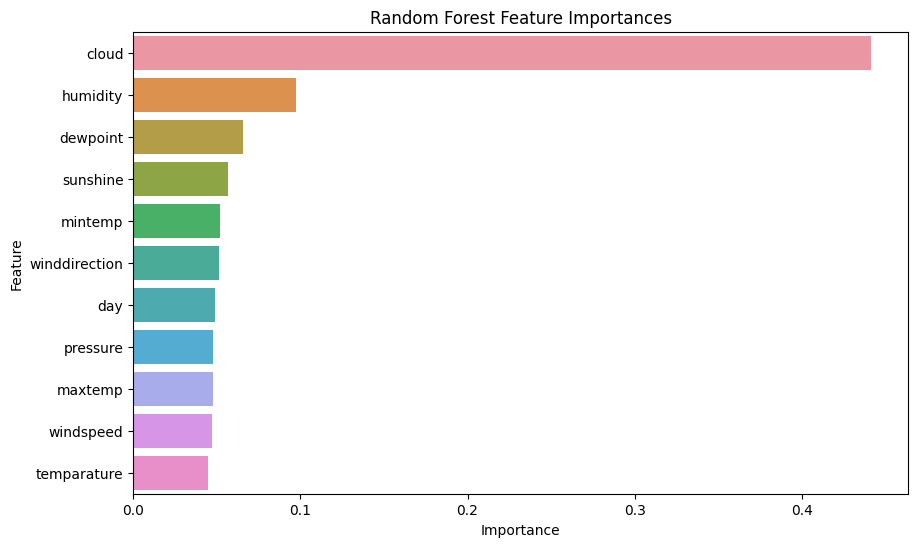

In [33]:
feature_importances = best_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": X_resampled.columns, "Importance": feature_importances}
)

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Print or visualize feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Visualize feature importances (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Random Forest Feature Importances")
plt.show()

# New Features

In [34]:
def preprocess_weather_data(data):
    # Feature Engineering
    data["dew_humidity"] = data["dewpoint"] * data["humidity"] # ***
    data["cloud_windspeed"] = data["cloud"] * data["windspeed"] # ***
    data["cloud_to_humidity"] = data["cloud"] / data["humidity"]
    data["temp_to_sunshine"] = data["sunshine"] / data["temparature"] # ***

    
    #data["temp_range"] = data["maxtemp"] - data["mintemp"]
    #data["temp_from_dewpoint"] = data["temparature"] - data["dewpoint"] # **?
    #data["wind_speeddirection"] = data["windspeed"] * data["winddirection"]
    #data['avg_temp'] = (data['maxtemp'] + data['mintemp']) / 2
    #data['cloud_persistence'] = data['cloud'] * data['sunshine']  # If both are low, it means the cloud cover persists.
    #data['pressure_temp_ratio'] = data['pressure'] / (data['temparature'] + 1)  # Avoid division by zero.
    #data['dew_temp_diff'] = data['temparature'] - data['dewpoint']
    #data['dew_humidity_ratio'] = data['dewpoint'] / (data['humidity'] + 1)
    #data['cloud_humidity_plus'] = data['cloud'] + data["humidity"] 
    #data['cloud_humidity_sunshine_plus'] = data['cloud'] + data["humidity"] + data['sunshine']
    #data['cloud_sunshine_*'] = data['cloud'] * data['sunshine']
    data['wind_temp_interaction'] = data['windspeed'] * data['temparature']
    #data['sunshine_wind_interaction'] = data['sunshine'] + data['windspeed'] # *
    #data['cloud_humidity_ratio'] = data['cloud'] + (data['humidity'])  # Avoid division by zero
    #data['pressure_temp_ratio'] = data['pressure'] / (data['temparature'] + 1)  # Avoid division by zero
    #data['cloud_wind_ratio'] = data['cloud'] / (data['windspeed'] + 1)  # Avoid division by zero


    #data['cloud_coverage_rate'] = data['cloud'] / 100  # Normalize to 0-1 range 
    #data['cloud_sun_interaction'] = data['cloud'] * (1 - data['sunshine'])

    
    #data['weather_severity'] = (data['cloud'] * data['humidity']) / (data['pressure'] * (data['sunshine'] + 1))
    data['cloud_sun_ratio'] = data['cloud'] / (data['sunshine'] + 1) # ***
    #data["cloud_sunshine_+"] = data["cloud"] + data["sunshine"]
    #data["cloud_sunshine_-"] = data["cloud"] - data["sunshine"]
    data["dew_humidity/sun"] = data["dewpoint"] * data["humidity"] / (data['sunshine'] + 1)
    data["dew_humidity_+"] = data["dewpoint"] * data["humidity"]
    

    data['humidity_sunshine_*'] = data["humidity"] * data['sunshine']

    data["cloud_humidity/pressure"] = (data["cloud"] * data["humidity"]) / data["pressure"]
    

    # Extract temporal features
    data['month'] = ((data['day'] - 1) // 30 + 1).clip(upper=12)
    data['season'] = data['month'].apply(lambda x: 1 if 3 <= x <= 5  # Spring
                                         else 2 if 6 <= x <= 8  # Summer
                                         else 3 if 9 <= x <= 11  # Autumn
                                         else 0)  # Winter
    # Seasonal trends
    #data['season_temp_trend'] = data['temparature'] * data['season']
    data['season_cloud_trend'] = data['cloud'] * data['season']
    

    # Seasonal deviation from mean values
    data['season_cloud_deviation'] = data['cloud'] - data.groupby('season')['cloud'].transform('mean')
    data['season_temperature'] = data['temparature'] * data['season']  # Interaction of temper



    
    data = data.drop(columns=["month"])
    #data['season_temp_trend'] = data['avg_temp'] * data['season']
    #data['season_dewpoint_trend'] = data['dewpoint'] * data['season']
    #data["dew_humidity_with_season"] = data['humidity'] * data['season']
    
    data = data.drop(columns=["maxtemp", "winddirection","humidity","temparature","pressure","day","season"])

    return data

# Apply to train and test datasets
df_train_3 = preprocess_weather_data(df_train_2)
df_test_3 = preprocess_weather_data(df_test_2)

In [35]:
def new_temp_col(data):
    # data=data.copy()
    data['temp_range']=data['maxtemp']-data['mintemp']
    data['temp_variability'] =data[['maxtemp', 'mintemp']].std(axis=1)
    data['temp_dev_from_min']=data['temparature']-data['mintemp']
    data['temp_dev_from_max']=data['maxtemp'] - data['temparature']
    data['temp_avg'] = data[['maxtemp', 'temparature', 'mintemp']].mean(axis=1)
    return data

df_train_3 = new_temp_col(df_train_2)
df_test_3  = new_temp_col(df_test_2)

In [36]:
df_train_3.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,month,season,season_cloud_trend,season_cloud_deviation,season_temperature,temp_range,temp_variability,temp_dev_from_min,temp_dev_from_max,temp_avg
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,...,1,0,0.0,7.875657,0.0,1.3,0.919239,0.7,0.6,20.566667
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,...,1,0,0.0,10.875657,0.0,0.4,0.282843,1.1,-0.7,16.300000
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,...,1,0,0.0,-33.124343,0.0,4.8,3.394113,1.5,3.3,16.700000
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,...,1,0,0.0,14.875657,0.0,1.2,0.848528,0.9,0.3,17.600000
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,...,1,0,0.0,-35.124343,0.0,6.1,4.313351,3.2,2.9,18.300000


In [37]:
df_test_3.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,month,season,season_cloud_trend,season_cloud_deviation,season_temperature,temp_range,temp_variability,temp_dev_from_min,temp_dev_from_max,temp_avg
0,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,...,1,0,0.0,18.8,0.0,4.8,3.394113,3.1,1.7,15.333333
1,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,...,1,0,0.0,18.8,0.0,1.7,1.202082,0.7,1.0,16.600000
2,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,...,1,0,0.0,15.8,0.0,1.8,1.272792,1.0,0.8,10.333333
3,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,...,1,0,0.0,-35.2,0.0,5.4,3.818377,2.1,3.3,17.700000
4,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,...,1,0,0.0,-31.2,0.0,9.7,6.858936,7.4,2.3,12.100000


In [38]:
from imblearn.over_sampling import SMOTE



X = df_train_3.drop('rainfall', axis=1)
y = df_train_3['rainfall']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [39]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X_resampled and y_resampled are your resampled data

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

def objective(trial):
    """Objective function for Optuna."""
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"]) #or suggest_float for a percentage

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report["weighted avg"]["f1-score"]  # Optimize for F1-score

study = optuna.create_study(direction="maximize")  # Maximize F1-score
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train the final model with the best hyperparameters
best_clf = RandomForestClassifier(
    n_estimators=trial.params["n_estimators"],
    max_depth=trial.params["max_depth"],
    min_samples_split=trial.params["min_samples_split"],
    min_samples_leaf=trial.params["min_samples_leaf"],
    max_features=trial.params["max_features"],
    random_state=42,
)

best_clf.fit(X_resampled, y_resampled)
# best_y_pred = best_clf.predict(X_test)
# print("\nClassification Report (Best Model):")
# print(classification_report(y_test, best_y_pred))

[I 2025-03-07 10:19:50,472] A new study created in memory with name: no-name-da8fa7e4-1f3a-4c13-b5d7-d4554ac3795a
[I 2025-03-07 10:19:52,362] Trial 0 finished with value: 0.8695783806310653 and parameters: {'n_estimators': 227, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8695783806310653.
[I 2025-03-07 10:19:53,231] Trial 1 finished with value: 0.8725868416037236 and parameters: {'n_estimators': 119, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 1 with value: 0.8725868416037236.
[I 2025-03-07 10:19:56,770] Trial 2 finished with value: 0.874090639134607 and parameters: {'n_estimators': 437, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.874090639134607.
[I 2025-03-07 10:19:58,434] Trial 3 finished with value: 0.8680494155499384 and parameters: {'n_estimators': 280, 'max_depth': 6, 'min_s

Number of finished trials:  50
Best trial:
  Value:  0.8923359883712306
  Params: 
    n_estimators: 353
    max_depth: 18
    min_samples_split: 7
    min_samples_leaf: 1
    max_features: log2


RandomForestClassifier(max_depth=18, max_features='log2', min_samples_split=7,
                       n_estimators=353, random_state=42)

In [40]:
df_test_pred = best_clf.predict(df_test_3)
df_test_predictions = pd.DataFrame({'id': df_test["id"], 'rainfall': df_test_pred})

In [41]:
df_test_predictions

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [42]:
df_test_predictions.to_csv("submission.csv",index=False)